# 1. Data Wrangling

In [9]:
pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master



The following command must be run outside of the IPython shell:

    $ pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


## 1.1. Gathering Data
### 1.1.1. Define:
- import csv file (twitter-archive-enhanced.csv) into a DataFrame (df_twitter_raw)
- Download & import tsv file (image-predictions.tsv) into a DataFrame (df_images_raw)
- import json file (tweet-json.txt) into a DataFrame (df_tweets_raw)

### 1.1.2. Code:

In [1]:
import pandas as pd
import json
import numpy as np
import tweepy as tw
import os
import requests as req
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

#### 1.1.2.1. import csv file (twitter-archive-enhanced.csv) into a DataFrame (df_twitter_raw)


In [2]:
df_twitter_raw = pd.read_csv('Raw Data/twitter-archive-enhanced.csv')

#### 1.1.2.2. Download & import tsv file (image-predictions.tsv) into a DataFrame (df_images_raw)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file = url.split('/')[-1]
r = req.get(url)
if not os.path.isfile(file):
    with open(file, 'wb') as f:
        f.write(r.content)

In [4]:
df_images_raw = pd.read_csv('image-predictions.tsv', sep='\t')

#### 1.1.2.3.  import json file (tweet-json.txt) into a DataFrame (df_tweets_raw)

In [5]:
tweets = []
with open('Raw Data/tweet-json.txt') as f:
    for line in f:
        tweets.append(json.loads(line))
dic_tweets = tweets[0].keys()
df_tweets_raw = pd.DataFrame(tweets, columns = dic_tweets)

In [6]:
df_tweets_raw.to_csv('tweets_raw.csv', index= False)

## 1.2. Assessment
### 1.2.1. Define:
- asses the 3 dataframes visually and programatically

### 1.2.2. Code:
#### 1.2.2.1. df_twitter_raw


In [7]:
pd.set_option('display.max_colwidth', -1)

In [8]:
df_twitter_raw

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [9]:
df_twitter_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_twitter_raw.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_twitter_raw['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [12]:
df_twitter_raw['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [13]:
sum(df_twitter_raw.duplicated())

0

- some tweets are replies and retweets
- timestamp column dtype not correct
- dog stages columns contain 'None' as values
- rating_numerator contains wrong inputs
- rating_denominator contains wrong inputs
- tweet_id column dtype not correct
- Some tweets are not with expanded_urls (no Images)
- source of tweeting included in the source url
- columns not required in master sheet (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- Set column (tweet_id) as index when merging dataframes

#### 1.2.2.2. df_images_raw


In [14]:
df_images_raw

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
df_images_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_images_raw.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
df_images_raw['img_num'].value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [18]:
sum(df_images_raw.duplicated())

0

- There are entries in df_twitter_raw without images data
- tweet_id column dtype not correct
- columns labels not expressive
- images breed predection and if it's dog (distributed over 9 columns)
- identify the Non-dog images for tweet ids
- Set column (tweet_id) as index when merging dataframes




#### 1.2.2.1. df_tweets_raw

In [19]:
df_tweets_raw

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_

In [20]:
df_tweets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [21]:
sum(df_tweets_raw['id'].duplicated())

0

- change the column name from id to tweet_id
- Set column (tweet_id) as index when merging dataframes
- keep only the required columns ('id','retweet_count','favorite_count')
- two entries less than those in df_twitter_raw

### 1.2.3. Findings:
#### 1.2.3.1. Quality Issues

##### 1.2.3.1.1. df_twitter_raw
- some tweets are replies and retweets
- Some tweets are not with expanded_urls (no Image)
- timestamp column dtype not correct
- tweet_id column dtype not correct
- columns not required in master sheet (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- dog stages columns contain 'None' as values
- rating_numerator contains wrong inputs
- rating_denominator contains wrong inputs
- source of tweeting included in the source url

##### 1.2.3.1.2. df_images_raw
- There are entries in df_twitter_raw without images data
- columns labels not expressive
- tweet_id column dtype not correct
- images breed predection and if it's dog (distributed over 9 columns)
- identify the Non-dog images for tweet ids
- Set column (tweet_id) as index when merging dataframes

##### 1.2.3.1.3. df_tweets_raw
- change the column name from id to tweet_id
- Set column (tweet_id) as index when merging dataframes
- keep only the required columns ('id','retweet_count','favorite_count')
- two entries less than those in df_twitter_raw

#### 1.2.3.2. Tidiness Issues 
- columns not required in master sheet (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- Set column (tweet_id) as index when merging dataframes
- arrange dataframe by timestamp
 

### 1.3. Cleaning Data:
### 1.3.1. Quality Issues

#### 1.3.1.1. df_twitter_raw
- Drop rows of replies and retweets

 

In [22]:
df_twitter_clean = df_twitter_raw[df_twitter_raw['in_reply_to_status_id'].isnull()]

In [23]:
df_twitter_clean = df_twitter_clean[df_twitter_clean['retweeted_status_id'].isnull()]

In [24]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

- Drop rows of tweets with no expanded_urls (no Image)

In [25]:
df_twitter_clean = df_twitter_clean[df_twitter_clean['expanded_urls'].notnull()]

In [26]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: float64(4), int64(3), object(10)

- Modify timestamp column dtype
- Modify tweet_id column dtype


In [27]:
df_twitter_clean['timestamp']= pd.to_datetime(df_twitter_clean['timestamp'])
df_twitter_clean['tweet_id'] = df_twitter_clean['tweet_id'].astype(str)

In [28]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns](1), floa

- columns not required in master sheet (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

In [29]:
df_twitter_clean = df_twitter_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'])

In [30]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.7+ KB


In [31]:
df_twitter_clean['doggo'].value_counts()


None     2011
doggo    83  
Name: doggo, dtype: int64

In [32]:
df_twitter_clean['floofer'].value_counts()

None       2084
floofer    10  
Name: floofer, dtype: int64

In [33]:
df_twitter_clean['pupper'].value_counts()

None      1865
pupper    229 
Name: pupper, dtype: int64

In [34]:
df_twitter_clean['puppo'].value_counts()

None     2070
puppo    24  
Name: puppo, dtype: int64

- convert 'None' in dog stages columns to Nan
- combine the 4 dog stages colums into a 'dog_stages' column

In [35]:
df_twitter_clean.iloc[:, -4:]= df_twitter_clean.iloc[:,-4:].replace('None', '')

In [36]:
df_twitter_clean['dog_stage']= df_twitter_clean['doggo'] + df_twitter_clean['floofer'] + df_twitter_clean['pupper'] + df_twitter_clean['puppo']

In [37]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dog_stage             2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 229.0+ KB


In [38]:
df_twitter_clean['dog_stage'].value_counts()

                1759
pupper          220 
doggo           72  
puppo           23  
floofer         9   
doggopupper     9   
doggopuppo      1   
doggofloofer    1   
Name: dog_stage, dtype: int64

In [39]:

df_twitter_clean['dog_stage'].replace({'doggopupper':'doggo-pupper','doggopuppo':'doggo-puppo', 'doggofloofer':'doggo-floofer' }, inplace=True)

In [40]:
df_twitter_clean['dog_stage'].value_counts()

                 1759
pupper           220 
doggo            72  
puppo            23  
doggo-pupper     9   
floofer          9   
doggo-puppo      1   
doggo-floofer    1   
Name: dog_stage, dtype: int64

In [41]:
df_twitter_clean.loc[df_twitter_clean.dog_stage == '', 'dog_stage'] = np.nan

In [42]:

df_twitter_clean['dog_stage'].value_counts()

pupper           220
doggo            72 
puppo            23 
doggo-pupper     9  
floofer          9  
doggo-puppo      1  
doggo-floofer    1  
Name: dog_stage, dtype: int64

In [43]:
df_twitter_clean = df_twitter_clean.drop(columns = ['doggo', 'floofer', 'pupper','puppo'])

In [44]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stage             335 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.6+ KB


- extract the tweets source from column 'source'

In [45]:
df_twitter_clean.source[:3]

0    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [46]:
df_twitter_clean['source']=df_twitter_clean.source.apply(lambda x:re.findall (r'>(.*)<',x)[0])

In [47]:
df_twitter_clean['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene    91  
Twitter Web Client     30  
TweetDeck              11  
Name: source, dtype: int64

- correct rating_denominator values by reviewing text
- correct rating_numerator values by reviewing text


In [48]:
df_twitter_clean.describe()

,rating_numerator,rating_denominator
count,2094.000000,2094.000000
mean,12.191500,10.449379
std,40.393858,6.649800
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [49]:
df_twitter_clean['rating_denominator'].value_counts()

10     2077
50     3   
11     2   
80     2   
7      1   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
2      1   
Name: rating_denominator, dtype: int64

In [50]:
df_twitter_clean['rating_numerator'].value_counts()

12      485
10      434
11      413
13      287
9       153
8       98 
7       52 
14      38 
5       34 
6       32 
3       19 
4       16 
2       9  
1       5  
26      1  
44      1  
165     1  
24      1  
60      1  
50      1  
144     1  
80      1  
84      1  
88      1  
121     1  
204     1  
420     1  
1776    1  
27      1  
45      1  
75      1  
99      1  
0       1  
Name: rating_numerator, dtype: int64

In [51]:
df_twitter_clean[df_twitter_clean['rating_numerator'] > 20][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [52]:
df_twitter_clean['rating_numerator'] = df_twitter_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')



In [53]:
df_twitter_clean[df_twitter_clean['rating_numerator'] > 20][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50


In [54]:
df_twitter_clean[(df_twitter_clean['rating_denominator'] != 10) & (df_twitter_clean['rating_denominator'] %10 == 0 )][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40


In [55]:
df_twitter_clean.loc[df_twitter_clean.index == 1202, ['rating_numerator','rating_denominator']] = [11,10]

In [56]:
df_twitter_clean.loc[df_twitter_clean.index == 1165, ['rating_numerator','rating_denominator']] = [13,10]

In [57]:
df_twitter_clean[(df_twitter_clean['rating_denominator'] != 10) & (df_twitter_clean['rating_denominator'] %10 == 0 )]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
433,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70,None,NaN
902,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150,None,NaN
1120,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170,this,NaN
1228,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90,None,NaN
1254,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80,None,NaN
1274,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50,None,NaN
1351,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60.0,50,a,NaN
1433,697463031882764288,2016-02-10 16:51:59,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44.0,40,None,NaN
1635,684222868335505415,2016-01-05 04:00:18,Twitter for iPhone,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121.0,110,None,NaN
1779,677716515794329600,2015-12-18 05:06:23,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144.0,120,None,NaN


In [58]:
dogs_count = df_twitter_clean.rating_denominator[df_twitter_clean['rating_denominator'] %10 ==0 ]/10


In [59]:
dogs_count.value_counts()

1.0     2079
5.0     2   
8.0     2   
12.0    1   
11.0    1   
4.0     1   
9.0     1   
17.0    1   
15.0    1   
7.0     1   
Name: rating_denominator, dtype: int64

In [60]:
df_twitter_clean.loc[df_twitter_clean['rating_denominator'] %10 ==0, ['rating_numerator', 'rating_denominator']] = [df_twitter_clean.rating_numerator[df_twitter_clean.rating_denominator %10 ==0]/dogs_count , 10]

In [61]:
df_twitter_clean[df_twitter_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7,Sam,NaN
1068,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11,None,NaN
1662,682962037429899265,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7.0,11,Darrel,NaN
2335,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,2,an,NaN


In [62]:
df_twitter_clean.loc[df_twitter_clean.index == 516, ['rating_numerator','rating_denominator']] = np.nan

In [63]:
df_twitter_clean[df_twitter_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",NaN,NaN,Sam,NaN
1068,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11.0,None,NaN
1662,682962037429899265,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7.0,11.0,Darrel,NaN
2335,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,2.0,an,NaN


In [64]:
df_twitter_clean.loc[[1165,1068,2335], ['rating_numerator','rating_denominator']] = [[14,10,9], 10]
df_twitter_clean.loc[[1165,1068,2335], ['rating_numerator','rating_denominator']] 

,rating_numerator,rating_denominator
1165,14.0,10.0
1068,10.0,10.0
2335,9.0,10.0


- save Outcome

In [65]:
df_twitter_clean.to_csv('twitter_clean.csv', index=False)

#### 1.3.1.2. df_images_raw
- Change tweet_id column dtype to str

In [66]:
df_images_clean = df_images_raw.copy()

In [67]:
df_images_clean['tweet_id'] = df_images_clean['tweet_id'].astype(str)

In [68]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


- Change the columns labels to be expressive

In [69]:
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
df_images_clean.columns = cols


- identify the most propable breed for tweet ids
- identify the Non-dog images for tweet ids

In [70]:
df_images_clean[df_images_clean['breed_1'] == False].prediction_1.value_counts()

seat_belt           22
web_site            19
teddy               18
dingo               9 
tennis_ball         9 
doormat             8 
bath_towel          7 
hamster             7 
swing               7 
tub                 7 
Siamese_cat         7 
ice_bear            6 
home_theater        6 
car_mirror          6 
llama               6 
hippopotamus        5 
porcupine           5 
ox                  5 
shopping_cart       5 
minivan             5 
brown_bear          4 
Arctic_fox          4 
jigsaw_puzzle       4 
guinea_pig          4 
patio               4 
goose               4 
barrow              4 
bathtub             4 
wombat              4 
hog                 4 
                   .. 
skunk               1 
traffic_light       1 
lynx                1 
pot                 1 
timber_wolf         1 
crash_helmet        1 
convertible         1 
cheeseburger        1 
coil                1 
bald_eagle          1 
restaurant          1 
three-toed_sloth    1 
guenon     

In [71]:
df_images_clean[df_images_clean['breed_2'] == False].prediction_1.value_counts()

Chihuahua                   18
web_site                    14
chow                        12
teddy                       11
Labrador_retriever          11
pug                         10
Samoyed                     8 
tub                         7 
Pembroke                    6 
home_theater                6 
toy_poodle                  6 
bath_towel                  5 
doormat                     5 
minivan                     5 
porcupine                   5 
Chesapeake_Bay_retriever    4 
llama                       4 
hippopotamus                4 
car_mirror                  4 
hamster                     4 
jigsaw_puzzle               4 
kelpie                      4 
Pomeranian                  4 
bow_tie                     4 
patio                       4 
guinea_pig                  4 
prison                      3 
ox                          3 
Arabian_camel               3 
common_iguana               3 
                           .. 
ibex                        1 
washer  

In [72]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id        2075 non-null object
jpg_url         2075 non-null object
img_num         2075 non-null int64
prediction_1    2075 non-null object
confidence_1    2075 non-null float64
breed_1         2075 non-null bool
prediction_2    2075 non-null object
confidence_2    2075 non-null float64
breed_2         2075 non-null bool
prediction_3    2075 non-null object
confidence_3    2075 non-null float64
breed_3         2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [73]:
df_images_clean['dog_breed'] = np.nan
for i, row in df_images_clean.iterrows():
    if row['breed_1'] == True:
        df_images_clean.loc[i, ['dog_breed']]= row['prediction_1']
    elif row['breed_2'] == True:
        df_images_clean.loc[i, ['dog_breed']]= row['prediction_2']
    elif row['breed_3'] == True:
        df_images_clean.loc[i, ['dog_breed']]= row['prediction_3']
    else:
        df_images_clean.loc[i, ['dog_breed']]= 'Not Dog'


In [74]:
df_images_clean

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,Not Dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle


In [75]:
df_images_clean['dog_breed']=df_images_clean['dog_breed'].str.title()

In [76]:
df_images_clean['dog'] = np.nan
for i, row in df_images_clean.iterrows():
    if row['dog_breed'] == 'Not Dog':
        df_images_clean.loc[i, ['dog']]= False
    else:
        df_images_clean.loc[i, ['dog']]= True

- save Outcome

In [77]:
df_images_clean.to_csv('images_clean.csv', index=False)

#### 1.3.1.3. df_tweets_raw
- keep only the required columns ('id','retweet_count','favorite_count')

In [78]:
df_tweets_clean = df_tweets_raw[['id','created_at','retweet_count','favorite_count']].copy()

- change the column name from id to tweet_id

In [79]:
df_tweets_clean = df_tweets_clean.rename(columns = {'id':'tweet_id'})

- Change tweet_id column dtype to str

In [80]:
df_tweets_clean['tweet_id'] = df_tweets_clean['tweet_id'].astype(str)

In [81]:
df_tweets_clean['created_at']= pd.to_datetime(df_tweets_clean['created_at'])

- save Outcome

In [82]:
df_tweets_clean.to_csv('tweets_clean.csv', index=False)


### 1.3.2. Tidiness Issues 
- Set column (tweet_id) as index before merging


In [83]:
df_twitter_clean.set_index('tweet_id', inplace =True)
df_twitter_clean.head(2)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
tweet_id,,,,,,,,
892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN
892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN


In [84]:
df_images_clean.set_index('tweet_id', inplace=True)
df_images_clean.head(2)

,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3,dog_breed,dog
tweet_id,,,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_Springer_Spaniel,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone,True


In [85]:
df_tweets_clean.set_index('tweet_id', inplace= True)
df_tweets_clean.head(2)

,created_at,retweet_count,favorite_count
tweet_id,,,
892420643555336193,2017-08-01 16:23:56,8853,39467
892177421306343426,2017-08-01 00:17:27,6514,33819


- combine a master dataframe by concatinating the 3 clean Dataframes with index (tweet_id)


In [86]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 892420643555336193 to 666020888022790149
Data columns (total 8 columns):
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2093 non-null float64
rating_denominator    2093 non-null float64
name                  2094 non-null object
dog_stage             335 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 147.2+ KB


In [87]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 13 columns):
jpg_url         2075 non-null object
img_num         2075 non-null int64
prediction_1    2075 non-null object
confidence_1    2075 non-null float64
breed_1         2075 non-null bool
prediction_2    2075 non-null object
confidence_2    2075 non-null float64
breed_2         2075 non-null bool
prediction_3    2075 non-null object
confidence_3    2075 non-null float64
breed_3         2075 non-null bool
dog_breed       2075 non-null object
dog             2075 non-null bool
dtypes: bool(4), float64(3), int64(1), object(5)
memory usage: 170.2+ KB


In [88]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 3 columns):
created_at        2354 non-null datetime64[ns]
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 73.6+ KB


In [89]:
df_twitter_tweets = pd.concat([df_twitter_clean, df_tweets_clean], axis = 1, sort=True)

In [90]:
df_twitter_master = pd.concat([df_twitter_tweets, df_images_clean], axis = 1, sort=True)

In [91]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 666020888022790149 to 892420643555336193
Data columns (total 24 columns):
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2093 non-null float64
rating_denominator    2093 non-null float64
name                  2094 non-null object
dog_stage             335 non-null object
created_at            2354 non-null datetime64[ns]
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
prediction_1          2075 non-null object
confidence_1          2075 non-null float64
breed_1               2075 non-null object
prediction_2          2075 non-null object
confidence_2          2075 non-null float64
breed_2               2075 non-null object
prediction_3          2075 n

- keep only tweets with images predections

In [92]:
df_twitter_master.dropna(subset = ['jpg_url'], axis= 0,  inplace = True)

In [93]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 24 columns):
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null float64
name                  1971 non-null object
dog_stage             303 non-null object
created_at            2073 non-null datetime64[ns]
retweet_count         2073 non-null float64
favorite_count        2073 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
prediction_1          2075 non-null object
confidence_1          2075 non-null float64
breed_1               2075 non-null object
prediction_2          2075 non-null object
confidence_2          2075 non-null float64
breed_2               2075 non-null object
prediction_3          2075 n

In [94]:
df_twitter_master.dropna(subset = ['timestamp'], axis= 0,  inplace = True)

In [95]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 666020888022790149 to 892420643555336193
Data columns (total 24 columns):
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null float64
name                  1971 non-null object
dog_stage             303 non-null object
created_at            1971 non-null datetime64[ns]
retweet_count         1971 non-null float64
favorite_count        1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
prediction_1          1971 non-null object
confidence_1          1971 non-null float64
breed_1               1971 non-null object
prediction_2          1971 non-null object
confidence_2          1971 non-null float64
breed_2               1971 non-null object
prediction_3          1971 n

- verify the time stamp and created_at from tweets & twitter dataframes are the same

In [96]:
df_twitter_master['timestamp_verify'] = df_twitter_master['timestamp'] == df_twitter_master['created_at']

In [97]:
df_twitter_master['timestamp_verify'].value_counts()

True    1971
Name: timestamp_verify, dtype: int64

In [98]:
df_twitter_master.drop(columns = ['timestamp_verify', 'created_at'], inplace=True)


In [99]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 666020888022790149 to 892420643555336193
Data columns (total 23 columns):
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null float64
name                  1971 non-null object
dog_stage             303 non-null object
retweet_count         1971 non-null float64
favorite_count        1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
prediction_1          1971 non-null object
confidence_1          1971 non-null float64
breed_1               1971 non-null object
prediction_2          1971 non-null object
confidence_2          1971 non-null float64
breed_2               1971 non-null object
prediction_3          1971 non-null object
confidence_3          1971 non-null 


- arrange dataframe by timestamp

In [100]:
df_twitter_master.sort_values(by='timestamp')

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3,dog_breed,dog
666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,None,NaN,532.0,2535.0,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_Springer_Spaniel,True
666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,a,NaN,48.0,132.0,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone,True
666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,a,NaN,47.0,128.0,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_Shepherd,True
666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,a,NaN,147.0,311.0,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_Ridgeback,True
666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,None,NaN,41.0,111.0,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature_Pinscher,True
666050758794694657,2015-11-16 00:30:50,Twitter for iPhone,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10.0,10.0,a,NaN,60.0,136.0,...,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_Mountain_Dog,True
666051853826850816,2015-11-16 00:35:11,Twitter for iPhone,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2.0,10.0,an,NaN,879.0,1253.0,...,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,Not Dog,False
666055525042405380,2015-11-16 00:49:46,Twitter for iPhone,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10.0,10.0,a,NaN,261.0,448.0,...,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,Chow,True
666057090499244032,2015-11-16 00:55:59,Twitter for iPhone,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9.0,10.0,a,NaN,146.0,304.0,...,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,Golden_Retriever,True
666058600524156928,2015-11-16 01:01:59,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8.0,10.0,the,NaN,61.0,115.0,...,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,

- Save result

In [101]:
df_twitter_master.to_csv('twitter_archive_master.csv')

- Data now ready to act on

# 2. Data Visualization and Insights

## 2.1. exploratory chart
## 2.2. Profile over time
### 2.2.1. Interaction over time
### 2.2.2. Average tweets count over  time
### 2.2.3. correlation matrix between retweets and favorite
### 2.2.3. Interactions of images of dogs vs not dog images
### 2.2.4. Average rating over time
## 2.3. Dog Breeds
### 2.3.1. Tweets counts for dog breeds
### 2.3.2. Retweet & favorite counts for dog breeds
### 2.3.3. Retweet & favorite average for dog breeds
### 2.3.4. Average Rating for dog breeds
## 2.4. Dog Stages
### 2.4.1. Tweets Counts for dog stages
### 2.4.2. Retweet & favorite for dog stages
### 2.4.3. Average Rating for dog stages



In [102]:
df_tw_plt = df_twitter_master.set_index('timestamp')

In [103]:
df_tw_plt.drop(columns = ['img_num', 'jpg_url','text','expanded_urls', 'prediction_1','confidence_1', 'breed_1', 'prediction_2','confidence_2', 'breed_2', 'prediction_3','confidence_3', 'breed_3'], inplace= True)

In [104]:
df_tw_plt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1971 entries, 2015-11-15 22:32:08 to 2017-08-01 16:23:56
Data columns (total 9 columns):
source                1971 non-null object
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null float64
name                  1971 non-null object
dog_stage             303 non-null object
retweet_count         1971 non-null float64
favorite_count        1971 non-null float64
dog_breed             1971 non-null object
dog                   1971 non-null object
dtypes: float64(4), object(5)
memory usage: 154.0+ KB


In [105]:
df_tw_plt.loc[df_tw_plt.rating_numerator>20]

,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed,dog
timestamp,,,,,,,,,
2015-11-29 05:52:33,Twitter for iPhone,420.0,10.0,None,NaN,4324.0,7989.0,Not Dog,False
2016-07-04 15:00:45,TweetDeck,1776.0,10.0,Atticus,NaN,2772.0,5569.0,Not Dog,False


In [106]:
df_tw = df_tw_plt.loc[df_tw_plt['rating_numerator'] < 20]

In [107]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1968 entries, 2015-11-15 22:32:08 to 2017-08-01 16:23:56
Data columns (total 9 columns):
source                1968 non-null object
rating_numerator      1968 non-null float64
rating_denominator    1968 non-null float64
name                  1968 non-null object
dog_stage             303 non-null object
retweet_count         1968 non-null float64
favorite_count        1968 non-null float64
dog_breed             1968 non-null object
dog                   1968 non-null object
dtypes: float64(4), object(5)
memory usage: 153.8+ KB


## 2.1. exploratory chart


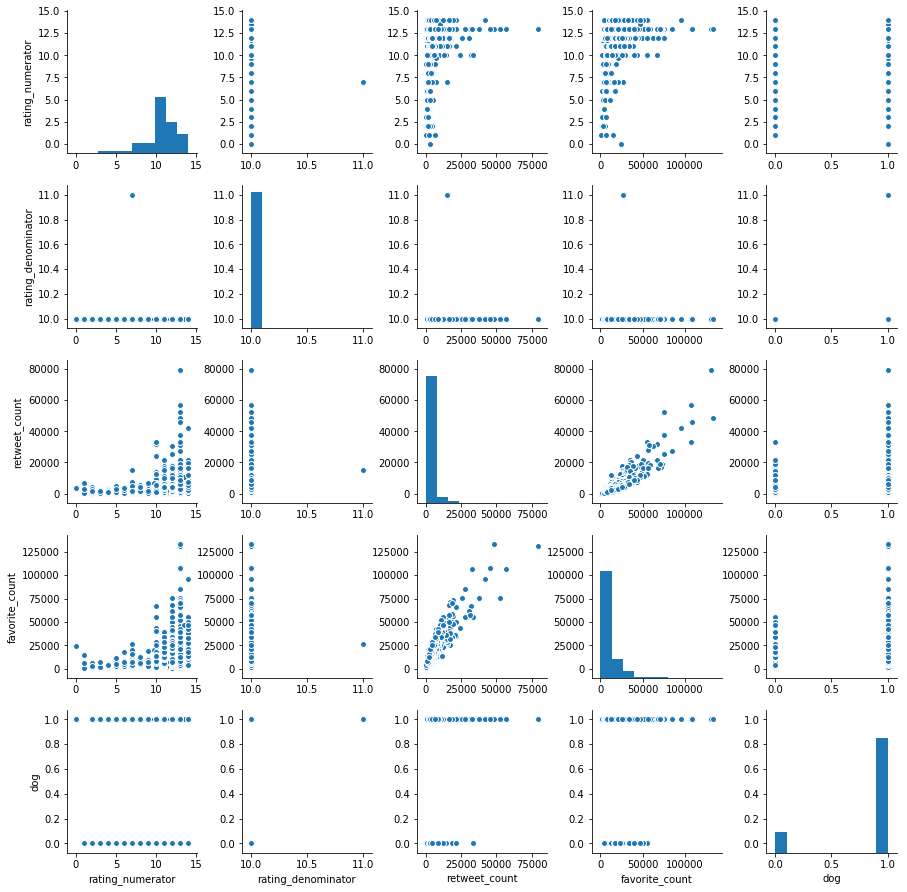

In [108]:
sb.pairplot(df_tw)
plt.savefig('figures/exploring.png')

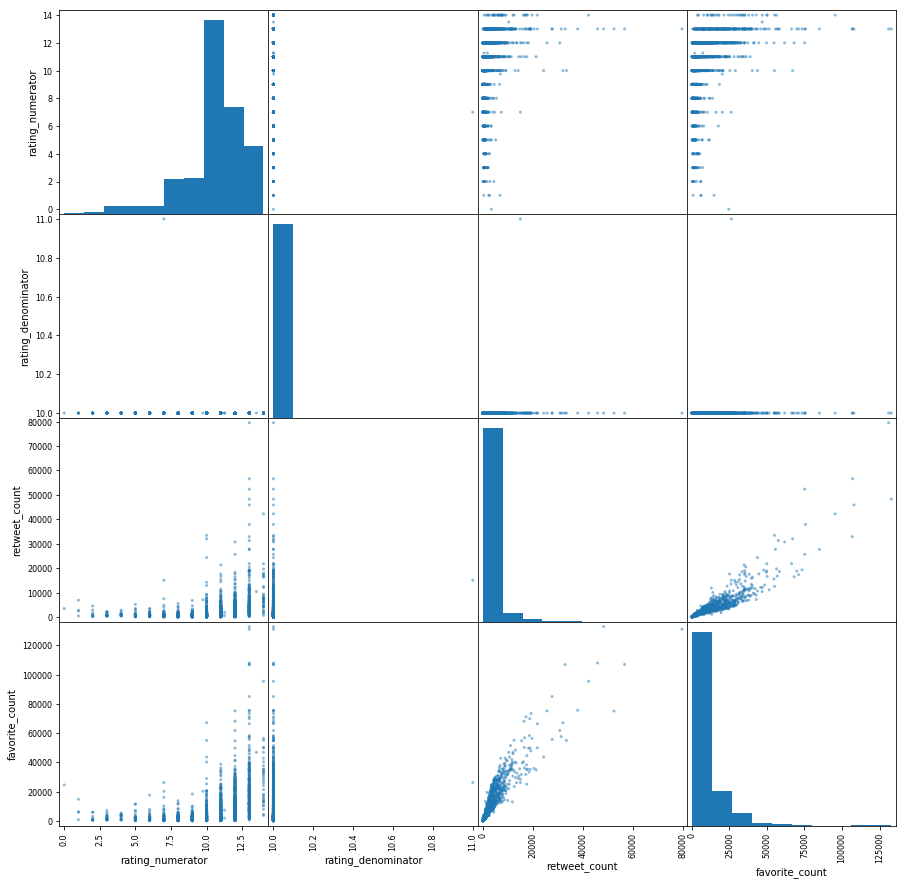

In [109]:
pd.plotting.scatter_matrix(df_tw, figsize=(15,15))
plt.savefig('figures/exploring2.png');

## 2.2. Profile over time
### 2.2.1. Interaction over time

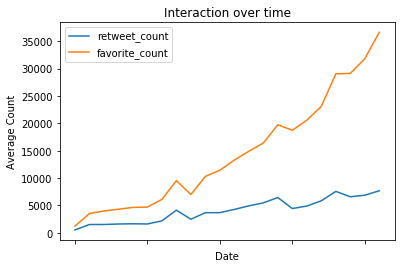

In [110]:
av_tw_month = df_tw.groupby([(df_tw.index.year),(df_tw.index.month)]).retweet_count.mean()
av_fv_month = df_tw.groupby([(df_tw.index.year),(df_tw.index.month)]).favorite_count.mean()

av_tw_month.plot(kind = 'line', title = 'Interaction over time', legend = True)
av_fv_month.plot(kind = 'line', title = 'Interaction over time', legend = True)
plt.xlabel('Date')
plt.ylabel('Average Count')
plt.xticks();
plt.savefig('figures/Interaction over time.png')


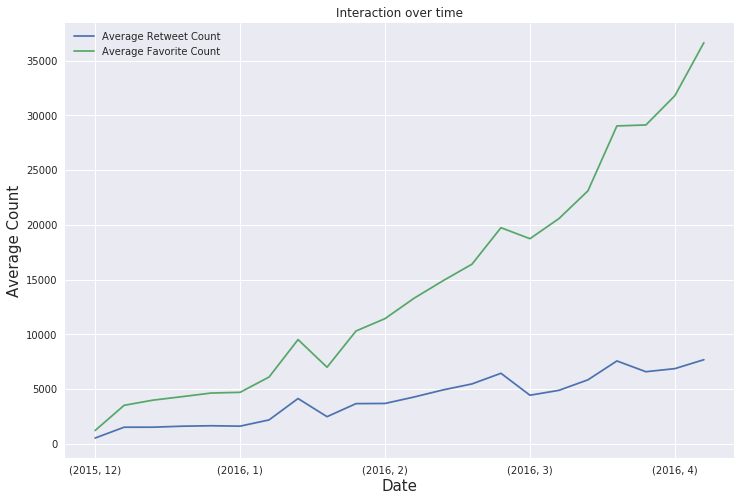

In [111]:
av_tw_month = df_tw.groupby([(df_tw.index.year),(df_tw.index.month)]).retweet_count.mean()
av_fv_month = df_tw.groupby([(df_tw.index.year),(df_tw.index.month)]).favorite_count.mean()


sb.set_context('notebook')
sb.set(rc={'figure.figsize':(12,8)})
fig, ax = plt.subplots()
ax = av_tw_month.plot(kind = 'line', label = 'Average Retweet Count', legend = True)
ax = av_fv_month.plot(kind = 'line', label = 'Average Favorite Count', legend = True)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Average Count', fontsize=15)
plt.legend()
plt.title('Interaction over time')
ax.set_xticklabels(av_tw_month.index);
plt.savefig('figures/Interaction over time2.png')

### 2.2.2. Average tweets count over  time

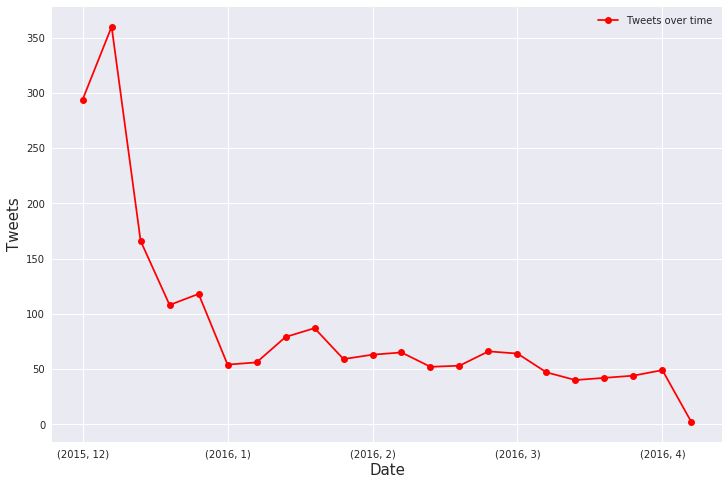

In [112]:
twt_month = df_tw.groupby([(df_tw.index.year),(df_tw.index.month)]).rating_denominator.count()

fig, ax = plt.subplots()
twt_month.plot(style = '-ro', figsize = (12,8), label = 'Tweets over time')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Tweets', fontsize=15)
plt.legend()
ax.set_xticklabels(twt_month.index);
plt.savefig('figures/Average tweets count over time.png')

### 2.2.3. correlation matrix between retweets and favorite


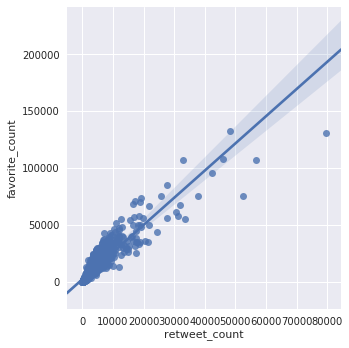

In [113]:
sb.lmplot(data= df_tw, x= 'retweet_count', y='favorite_count');
plt.savefig('figures/correlation matrix between retweets and favorite.png')

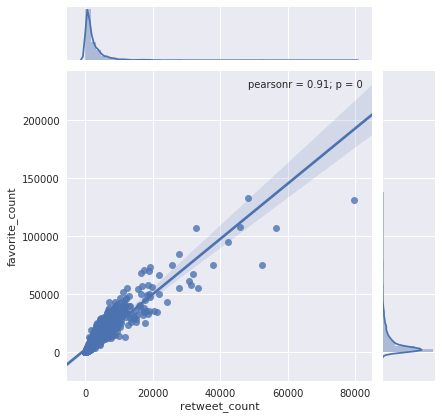

In [114]:
sb.jointplot(data= df_tw, x= 'retweet_count', y='favorite_count', kind='reg');
plt.savefig('figures/correlation matrix between retweets and favorite2.png')

### 2.2.3. Interactions of images of dogs vs not dog images



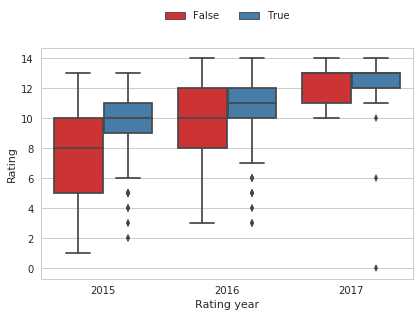

In [115]:
sb.set_context('notebook')
sb.set_style("whitegrid")
plt.subplots(figsize=(6,4))
sb.boxplot(df_tw.index.year, df_tw.rating_numerator , hue=df_tw.dog, palette= "Set1");
plt.legend(loc=8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.2), ncol=3, fancybox = True, shadow=True)
plt.xlabel('Rating year');plt.ylabel('Rating');
plt.tight_layout()
plt.savefig('figures/interactions of images of dogs vs not dog images over time.png')

In [116]:
df_tw.groupby(['dog']).retweet_count.describe()

,count,mean,std,min,25%,50%,75%,max
dog,,,,,,,,
False,303.0,2504.600660,3889.878411,34.0,573.0,1067.0,2541.5,33421.0
True,1665.0,2835.138138,4833.325952,16.0,650.0,1440.0,3261.0,79515.0


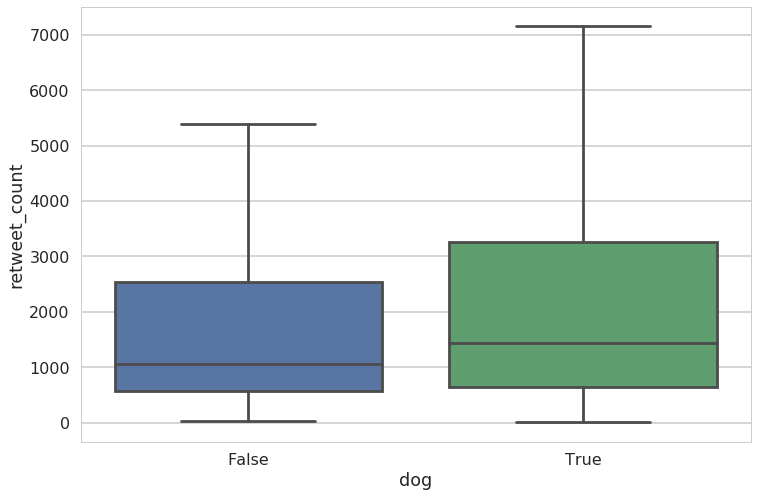

In [117]:
sb.set_context('poster')
ax=sb.boxplot(x='dog', y='retweet_count' , data=df_tw, showfliers= False);
plt.savefig('figures/Retweets of images of dogs vs not dog images.png')

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance 
  gid: an id string 
  horizontalalignment or ha: [ 'center' | 'right' | 'left' ] 
  label: string or anything printable with '%s' conversion. 
  linespacing: float (multiple of font size) 
  multialignment: ['left' | 'right' | 'center' ] 
  path_effects: unkn

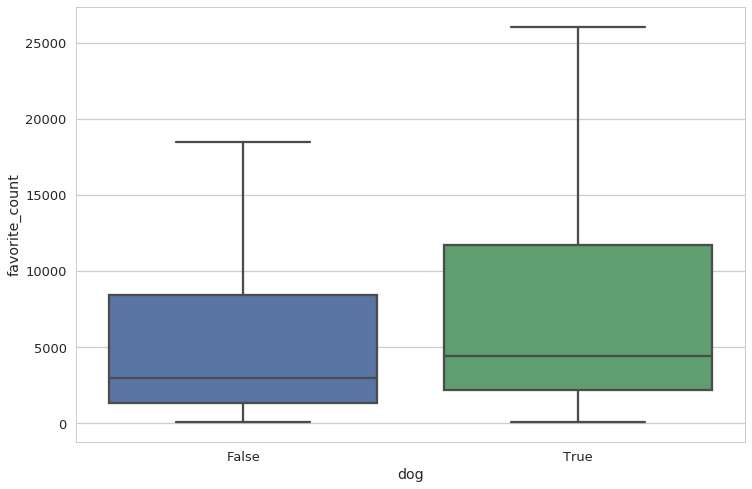

In [118]:
sb.set_context('talk')
ax=sb.boxplot(x='dog', y='favorite_count' , data=df_tw, showfliers= False)
plt.setp(ax.get_xticklabels());
plt.savefig('figures/Favorite of images of dogs vs not dog images.png')

### 2.2.4. Average rating over time

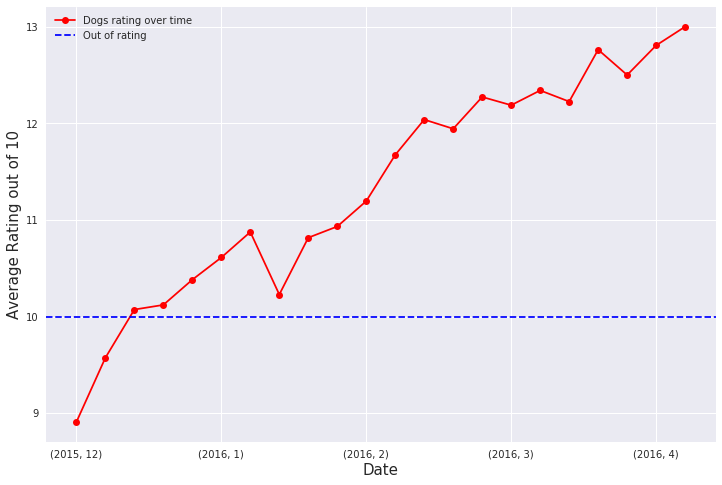

In [119]:
tw_month_rating = df_tw.groupby([(df_tw.index.year),(df_tw.index.month)]).rating_numerator.mean()

sb.set_context('notebook')
sb.set(rc={'figure.figsize':(12,8)})
fig, ax = plt.subplots()

tw_month_rating.plot(style = '-ro', figsize = (12,8), label = 'Dogs rating over time')
plt.axhline(y=10.0, color='b', linestyle='--', label='Out of rating')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Average Rating out of 10', fontsize=15)
plt.legend()
ax.set_xticklabels(tw_month_rating.index);
plt.savefig('figures/Average rating over time.png')

## 2.3. Dog Breeds
### 2.3.1. Tweets counts for dog breeds


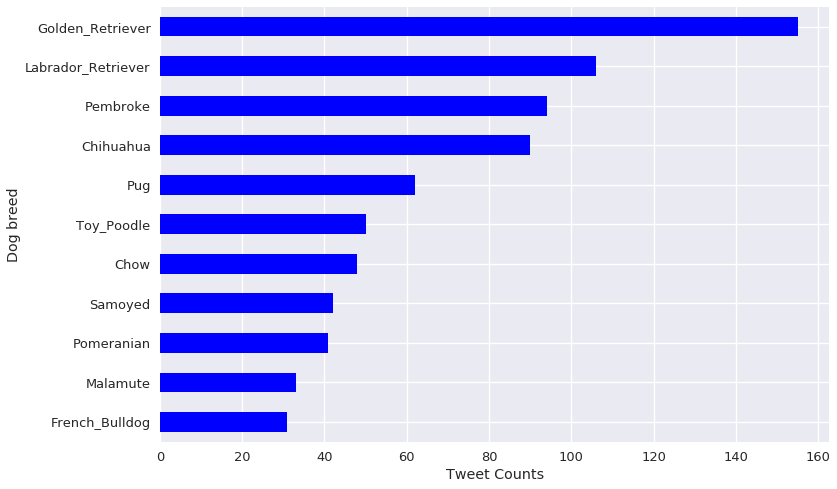

In [120]:
sb.set_context('talk')
df_tw[df_tw.dog == True].dog_breed.value_counts()[10: :-1].plot(kind='barh', color ='b')
plt.xlabel('Tweet Counts')
plt.ylabel('Dog breed');
plt.savefig('figures/Tweets counts for dog breeds.png')

### 2.3.2. Retweet & favorite counts for dog breeds


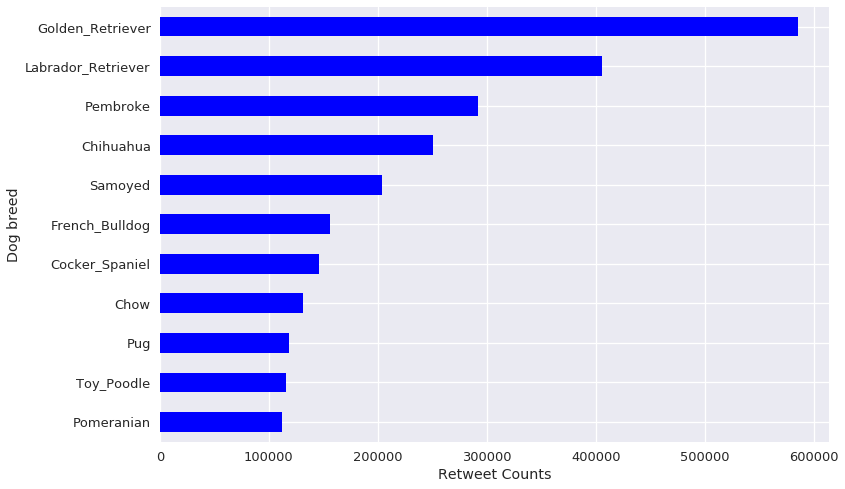

In [121]:
sb.set_context('talk')
df_tw[df_tw.dog == True].groupby(['dog_breed']).retweet_count.sum().sort_values(ascending=False)[10: :-1].plot(kind='barh', color ='b')
plt.xlabel('Retweet Counts')
plt.ylabel('Dog breed');
plt.savefig('figures/Retweet counts for dog breeds.png')

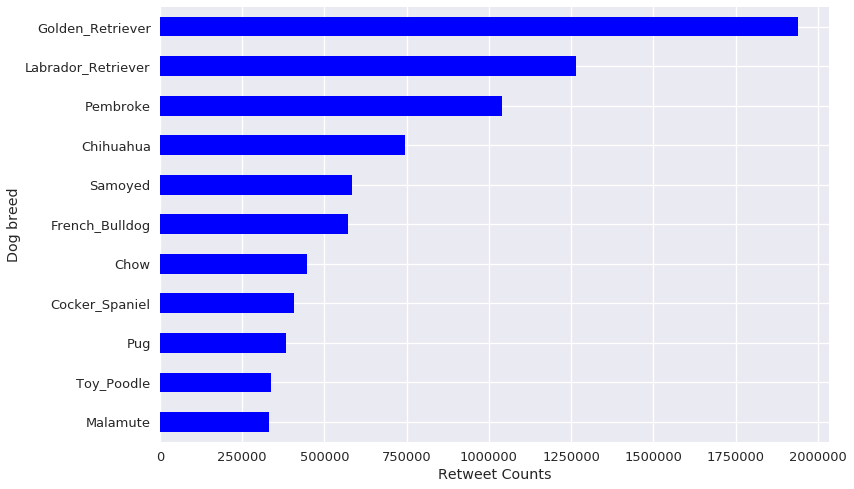

In [122]:
sb.set_context('talk')
df_tw[df_tw.dog == True].groupby(['dog_breed']).favorite_count.sum().sort_values(ascending=False)[10: :-1].plot(kind='barh', color ='b')
plt.xlabel('Retweet Counts')
plt.ylabel('Dog breed');
plt.savefig('figures/Favorite counts for dog breeds.png')

### 2.3.3. Retweet & favorite average for dog breeds


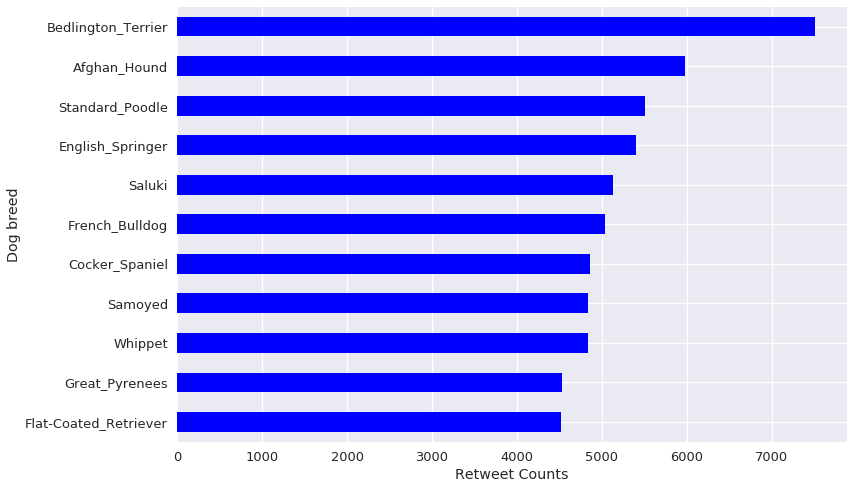

In [123]:
sb.set_context('talk')
df_tw[df_tw.dog == True].groupby(['dog_breed']).retweet_count.mean().sort_values(ascending=False)[10: :-1].plot(kind='barh', color ='b')
plt.xlabel('Retweet Counts')
plt.ylabel('Dog breed');
plt.savefig('figures/Retweet average for dog breeds.png')

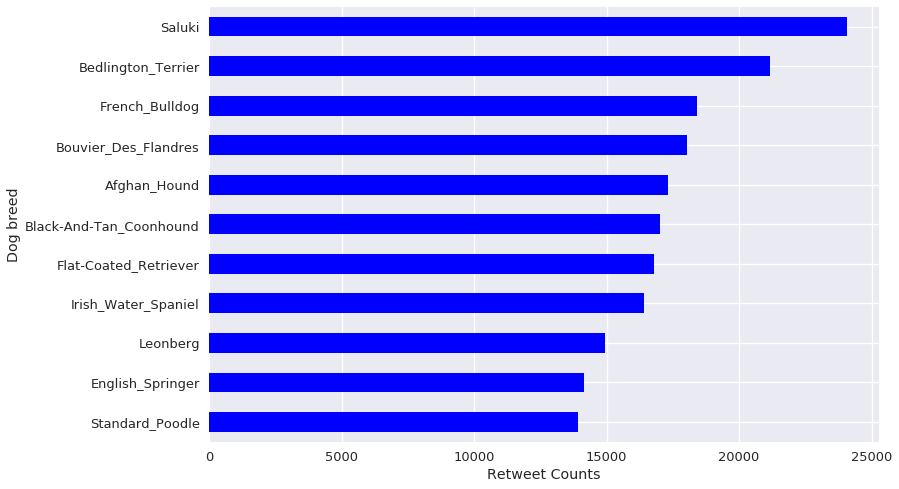

In [124]:
sb.set_context('talk')
df_tw[df_tw.dog == True].groupby(['dog_breed']).favorite_count.mean().sort_values(ascending=False)[10: :-1].plot(kind='barh', color ='b')
plt.xlabel('Retweet Counts')
plt.ylabel('Dog breed');
plt.savefig('figures/Favorite average for dog breeds.png')

## 2.4. Dog Stages
### 2.4.1. Tweets Counts for dog stages


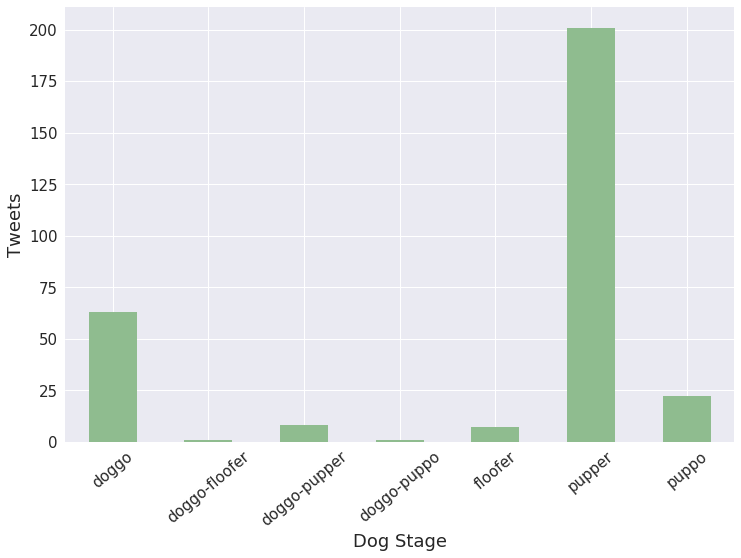

In [125]:
twt_month_stages = df_tw.groupby('dog_stage').rating_denominator.count()

sb.set_context('talk')
sb.set(rc={'figure.figsize':(12,8)})
ind = np.arange(len(twt_month_stages))
twt_month_stages.plot(kind= 'bar',fontsize=15, color= 'darkseagreen', rot=40)
plt.xlabel('Dog Stage', fontsize=18)
plt.ylabel('Tweets', fontsize=18);
plt.savefig('figures/Tweets Counts for dog stages.png')

### 2.4.2. Retweet & favorite for dog stages

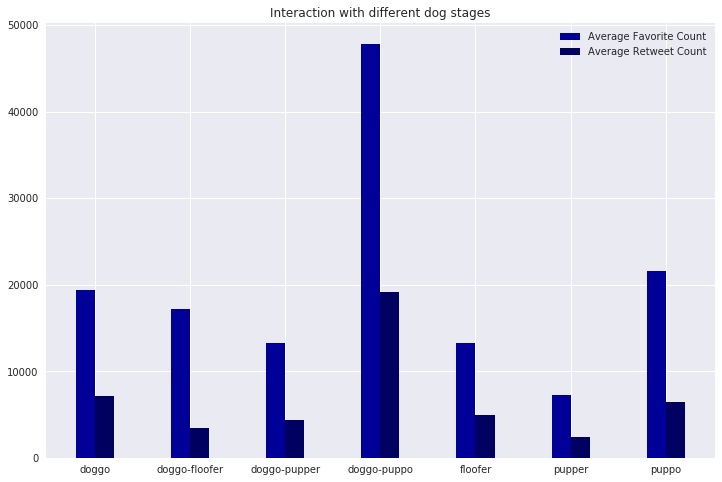

In [126]:
avg_fav_stage = df_tw.groupby('dog_stage').favorite_count.mean()
avg_retweet_stage = df_tw.groupby('dog_stage').retweet_count.mean()

sb.set_context('notebook')
sb.set(rc={'figure.figsize':(12,8)})
width=0.2
ind = np.arange(len(avg_fav_stage))
locations = ind + width/2
labels = avg_fav_stage.index

plt.bar(ind, avg_fav_stage, width, color= '#000099', label= 'Average Favorite Count')
plt.bar(ind+width, avg_retweet_stage, width, color= '#000060', label= 'Average Retweet Count')
plt.xticks(locations, labels)
plt.legend()
plt.title('Interaction with different dog stages');
plt.savefig('figures/Retweet & favorite for dog stages.png')

interacrtion against dog stages

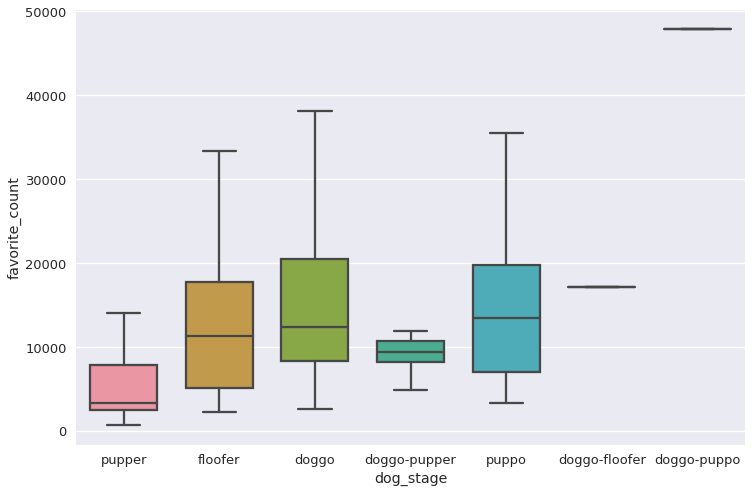

In [127]:
sb.set_context('talk')
ax=sb.boxplot(x='dog_stage', y='favorite_count' , data=df_tw, showfliers= False, width=0.7)
sb.set(rc={'figure.figsize':(10,16)});
plt.savefig('figures/Favorite for dog stages.png')


### 2.4.3. Average Rating for dog stages

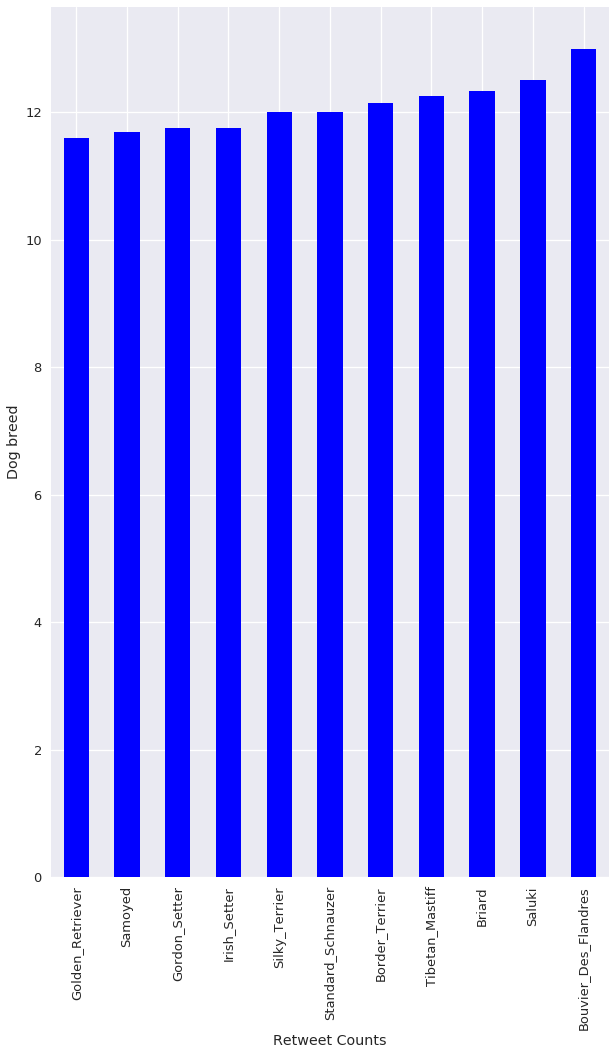

In [128]:
sb.set_context('talk')
df_tw[df_tw.dog == True].groupby(['dog_breed']).rating_numerator.mean().sort_values(ascending=False)[10: :-1].plot(kind='bar', color ='b')
plt.xlabel('Retweet Counts')
plt.ylabel('Dog breed');
plt.savefig('figures/Average Rating for dog stages-bar.png')

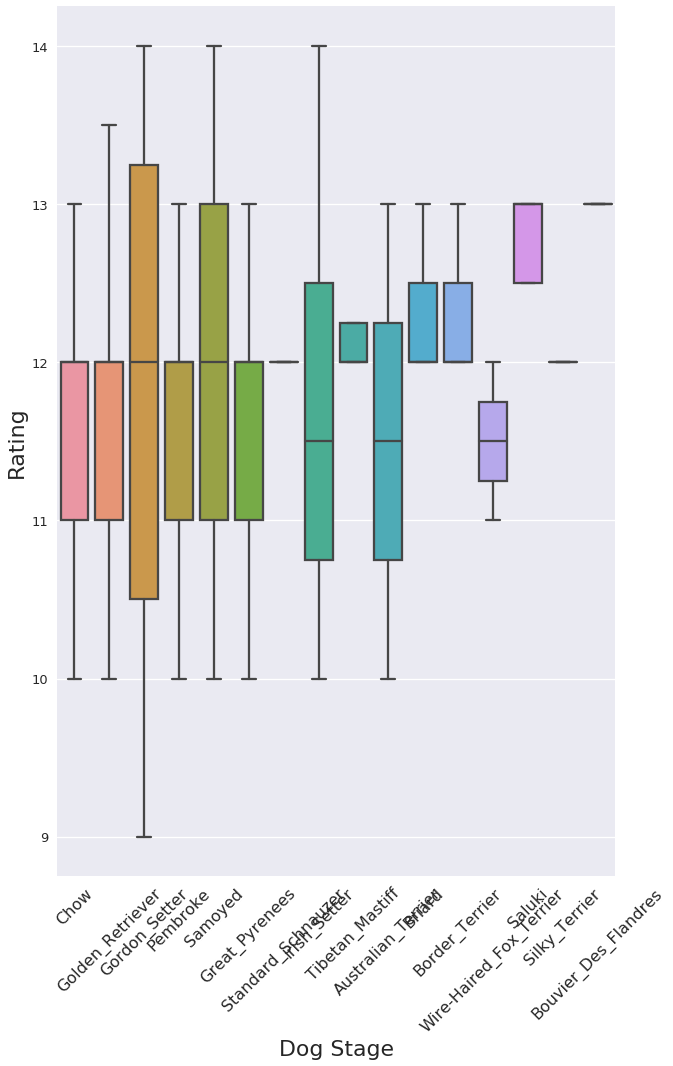

In [129]:
breed_filter = df_tw[df_tw.dog == True].groupby(['dog_breed']).rating_numerator.mean().sort_values(ascending=False)[15: :-1]


rating_breed = df_tw[df_tw.dog_breed.isin(breed_filter.index)]
sb.set_context('talk')
ax=sb.boxplot(x= 'dog_breed', y='rating_numerator' , data=rating_breed, showfliers= False )
sb.set(rc={'figure.figsize':(10,16)})
plt.xlabel('Dog Stage', fontsize=22)
plt.ylabel('Rating', fontsize=22)
plt.setp(ax.get_xticklabels(), fontsize=16, rotation=45);
plt.savefig('figures/Average Rating for dog stages-box.png')

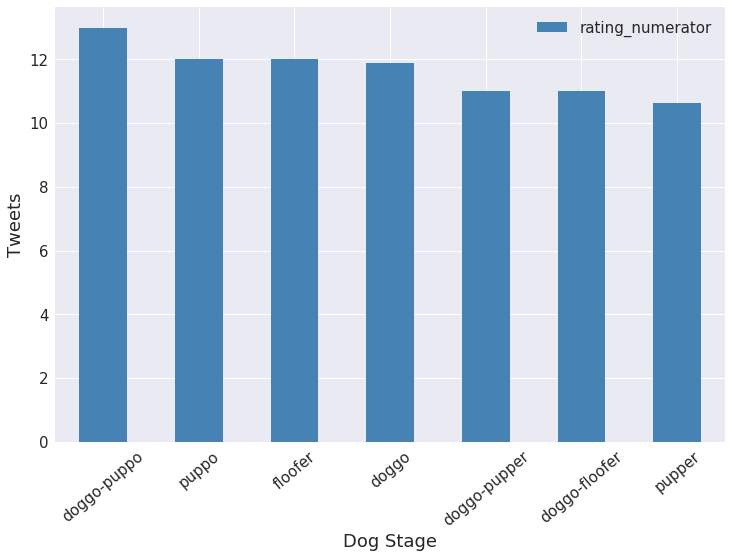

In [130]:
twt_rating_stages = df_tw.groupby('dog_stage').rating_numerator.mean().sort_values(ascending=False)

sb.set_context('notebook')
sb.set(rc={'figure.figsize':(12,8)})
ind = np.arange(len(twt_rating_stages))
twt_rating_stages.plot(kind= 'bar',fontsize=15, color= 'steelblue',sort_columns=True, rot=40)
plt.xlabel('Dog Stage', fontsize=18)
plt.ylabel('Tweets', fontsize=18)
plt.legend(fontsize=15);
plt.savefig('figures/Average Rating for dog stages-bar2.png')

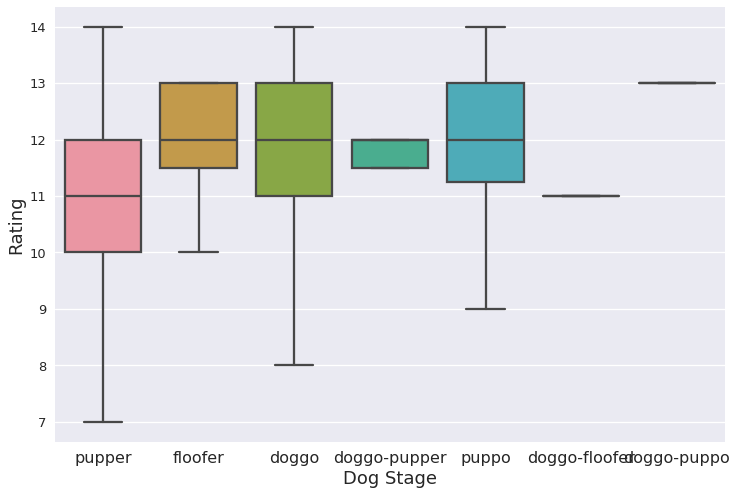

In [131]:
sb.set_context('talk')
ax=sb.boxplot(x='dog_stage', y='rating_numerator' , data=df_tw, showfliers= False,)
sb.set(rc={'figure.figsize':(18,16)})
plt.xlabel('Dog Stage', fontsize=18)
plt.ylabel('Rating', fontsize=18)
plt.setp(ax.get_xticklabels(), fontsize=16, rotation=0);
plt.savefig('figures/Average Rating for dog stages- box2.png')